<a href="https://colab.research.google.com/github/PavankumarUppar/DLL/blob/main/DLL_Lab_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code** **1**

In [ ]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass input through hidden layer and apply sigmoid activation
        hidden_output = self.sigmoid(self.hidden(x))
        # Pass hidden layer output through output layer and apply sigmoid activation
        output = self.sigmoid(self.output(hidden_output))
        return output

# Example usage:
input_size = 10  # Define the input size
hidden_size = 20  # Define the size of the hidden layer
output_size = 1  # Define the output size

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)
print(model)


NeuralNetwork(
  (hidden): Linear(in_features=10, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


**Code 2**

In [ ]:
import torch
import torch.nn as nn

class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, hidden_activation='tanh', output_activation='sigmoid'):
        super(DeepNeuralNetwork, self).__init__()

        # Define input layer
        self.input = nn.Linear(input_size, hidden_sizes[0])

        # Define hidden layers
        self.hidden_layers = nn.ModuleList()
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))

        # Define output layer
        self.output = nn.Linear(hidden_sizes[-1], output_size)

        # Define activation functions
        self.hidden_activation = self.get_activation(hidden_activation)
        self.output_activation = self.get_activation(output_activation)

    def get_activation(self, name):
        if name.lower() == 'relu':
            return nn.ReLU()
        elif name.lower() == 'tanh':
            return nn.Tanh()
        elif name.lower() == 'sigmoid':
            return nn.Sigmoid()
        elif name.lower() == 'softmax':
            return nn.Softmax(dim=-1)
        else:
            raise NotImplementedError("Activation function not implemented")

    def forward(self, x):
        # Input layer
        x = self.input(x)
        x = self.hidden_activation(x)

        # Hidden layers
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = self.hidden_activation(x)

        # Output layer
        x = self.output(x)
        x = self.output_activation(x)

        return x

# Example usage:
input_size = 10  # Define the input size
hidden_sizes = [20, 30, 15]  # Define the sizes of hidden layers
output_size = 5  # Define the output size

# Create an instance of the deep neural network
model = DeepNeuralNetwork(input_size, hidden_sizes, output_size, hidden_activation='relu', output_activation='softmax')
print(model)


DeepNeuralNetwork(
  (input): Linear(in_features=10, out_features=20, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=15, bias=True)
  )
  (output): Linear(in_features=15, out_features=5, bias=True)
  (hidden_activation): ReLU()
  (output_activation): Softmax(dim=-1)
)


**Code 3**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Create a simple dataset for demonstration purposes
# Random input data and output data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, (100, 1))  # Binary classification labels (0 or 1)

# Convert numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define a deep neural network
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DeepNeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.hidden(x))
        x = self.sigmoid(self.hidden2(x))
        x = self.sigmoid(self.output(x))
        return x

input_size = 5  # Number of input features
hidden_size = 10  # Size of the hidden layer
output_size = 1  # Output size

# Create an instance of the deep neural network
model = DeepNeuralNetwork(input_size, hidden_size, output_size)

# Define loss function and optimizer for Gradient Descent
criterion = nn.BCELoss()  # Binary Cross Entropy loss for binary classification
optimizer_gd = optim.SGD(model.parameters(), lr=0.01)  # Gradient Descent optimizer

# Train the model using Gradient Descent
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer_gd.zero_grad()
    loss.backward()
    optimizer_gd.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Define loss function and optimizer for Stochastic Gradient Descent
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer

# Train the model using Stochastic Gradient Descent
for epoch in range(num_epochs):
    for i in range(len(X)):
        # Forward pass
        output = model(X_tensor[i])
        loss = criterion(output, y_tensor[i])

        # Backward pass and optimization
        optimizer_sgd.zero_grad()
        loss.backward()
        optimizer_sgd.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.6733
Epoch [200/1000], Loss: 0.6732
Epoch [300/1000], Loss: 0.6731
Epoch [400/1000], Loss: 0.6731
Epoch [500/1000], Loss: 0.6731
Epoch [600/1000], Loss: 0.6731
Epoch [700/1000], Loss: 0.6731
Epoch [800/1000], Loss: 0.6731
Epoch [900/1000], Loss: 0.6731
Epoch [1000/1000], Loss: 0.6731
Epoch [100/1000], Loss: 0.5408
Epoch [200/1000], Loss: 0.5402
Epoch [300/1000], Loss: 0.5397
Epoch [400/1000], Loss: 0.5393
Epoch [500/1000], Loss: 0.5389
Epoch [600/1000], Loss: 0.5386
Epoch [700/1000], Loss: 0.5384
Epoch [800/1000], Loss: 0.5384
Epoch [900/1000], Loss: 0.5386
Epoch [1000/1000], Loss: 0.5389


**Code 4**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Splitting training dataset into train and validation sets
train_data, val_data = train_test_split(train_dataset, test_size=0.2, random_state=42, shuffle=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Create an instance of the CNN
model = CNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Evaluation on validation set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Validation Accuracy: {100 * correct / total}%")

# Evaluation on test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total}%")


100%|██████████| 9912422/9912422 [00:00<00:00, 80268189.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28876208.30it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 22638238.79it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4988355.27it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Step [100/750], Loss: 1.7544
Epoch [1/5], Step [200/750], Loss: 1.6870
Epoch [1/5], Step [300/750], Loss: 1.7129
Epoch [1/5], Step [400/750], Loss: 1.6490
Epoch [1/5], Step [500/750], Loss: 1.7211
Epoch [1/5], Step [600/750], Loss: 1.5585
Epoch [1/5], Step [700/750], Loss: 1.5962
Epoch [2/5], Step [100/750], Loss: 1.5315
Epoch [2/5], Step [200/750], Loss: 1.5099
Epoch [2/5], Step [300/750], Loss: 1.5042
Epoch [2/5], Step [400/750], Loss: 1.4945
Epoch [2/5], Step [500/750], Loss: 1.4885
Epoch [2/5], Step [600/750], Loss: 1.5426
Epoch [2/5], Step [700/750], Loss: 1.4763
Epoch [3/5], Step [100/750], Loss: 1.5123
Epoch [3/5], Step [200/750], Loss: 1.4742
Epoch [3/5], Step [300/750], Loss: 1.4974
Epoch [3/5], Step [400/750], Loss: 1.4805
Epoch [3/5], Step [500/750], Loss: 1.5030
Epoch [3/5], Step [600/750], Loss: 1.4918
Epoch [3/5], Step [700/750], Loss: 1.4747
Epoch [4/5], Step [100/750], Loss: 1.4860
E

**Code 5**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim

# Create a synthetic dataset for demonstration purposes
# Generate random stock prices
num_samples = 1000
seq_length = 10  # Sequence length for each input
num_features = 1  # Only using the stock price as a feature

# Creating synthetic stock price data
stock_prices = np.random.randn(num_samples)

# Prepare the data
input_data = []
target_data = []

for i in range(len(stock_prices) - seq_length):
    input_data.append(stock_prices[i:i + seq_length])
    target_data.append(stock_prices[i + seq_length])

input_data = np.array(input_data)
target_data = np.array(target_data)

# Convert data to PyTorch tensors
input_tensor = torch.from_numpy(input_data).unsqueeze(-1).float()
target_tensor = torch.from_numpy(target_data).unsqueeze(-1).float()

# Define a GRU-based model
class StockPriceGRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(StockPriceGRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Taking only the last output
        return out

# Define hyperparameters
input_size = num_features
hidden_size = 64
num_layers = 1
learning_rate = 0.001
num_epochs = 100

# Instantiate the model, define loss function and optimizer
model = StockPriceGRU(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    outputs = model(input_tensor)
    loss = criterion(outputs, target_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# Predictions
model.eval()
with torch.no_grad():
    test_input = input_tensor[-1].unsqueeze(0)  # Taking the last sequence for prediction
    predicted = model(test_input)
    print(f"Predicted price: {predicted.item()}")


Epoch [10/100], Loss: 0.998520
Epoch [20/100], Loss: 0.997015
Epoch [30/100], Loss: 0.997010
Epoch [40/100], Loss: 0.996886
Epoch [50/100], Loss: 0.996718
Epoch [60/100], Loss: 0.996580
Epoch [70/100], Loss: 0.996395
Epoch [80/100], Loss: 0.996087
Epoch [90/100], Loss: 0.995500
Epoch [100/100], Loss: 0.994196
Predicted price: 0.04365328699350357


**Code 6**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import string
import numpy as np

# Example text data (replace this with your own text data)
text = "This is an example text for generating text using LSTM in PyTorch. You can replace this with your own text data."

# Preprocess the text and create character mappings
all_characters = string.printable  # All printable ASCII characters
char_to_index = {ch: i for i, ch in enumerate(all_characters)}
index_to_char = {i: ch for i, ch in enumerate(all_characters)}
num_characters = len(all_characters)

# Convert text to a sequence of indices
text_indices = [char_to_index[ch] for ch in text]

# Create input-target pairs
input_indices = text_indices[:-1]
target_indices = text_indices[1:]

# Convert input and target to tensors
input_tensor = torch.tensor(input_indices, dtype=torch.long).unsqueeze(0)
target_tensor = torch.tensor(target_indices, dtype=torch.long).unsqueeze(0)

# Define the LSTM-based text generation model
class LSTMTextGenerator(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMTextGenerator, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        embedded = self.embedding(x)
        output, hidden = self.lstm(embedded, hidden)
        output = self.fc(output)
        return output, hidden

    def init_hidden(self, batch_size):
        return (torch.zeros(self.num_layers, batch_size, self.hidden_size),
                torch.zeros(self.num_layers, batch_size, self.hidden_size))

# Hyperparameters
input_size = num_characters  # Input size is the number of unique characters
hidden_size = 128
num_layers = 2
learning_rate = 0.01
num_epochs = 1000
sequence_length = 100  # Length of sequence used for training

# Instantiate the model, define loss function and optimizer
model = LSTMTextGenerator(input_size, hidden_size, num_layers, input_size)  # Output size = input size
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    hidden = model.init_hidden(1)  # Batch size = 1 for text generation
    total_loss = 0

    optimizer.zero_grad()
    output, hidden = model(input_tensor, hidden)
    loss = criterion(output.squeeze(0), target_tensor.squeeze(0))
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}')



import random
# Sample text data
text = "This is a sample text. You can replace this with your own text data."
def generate_text(start_letter='T', length=500):
    generated_text = start_letter
    current_letter = start_letter

    for i in range(length):
        next_chars = [text[idx + 1] for idx, char in enumerate(text) if char == current_letter and idx + 1 < len(text)]
        if not next_chars:
            break
        next_letter = random.choice(next_chars)
        generated_text += next_letter
        current_letter = next_letter

    return generated_text

# Generating text using the function
generated_text = generate_text(start_letter='T', length=500)
print("Generated Text:\n", generated_text)



def generate_text(model, start_letter='T', length=500):
    model.eval()
    with torch.no_grad():
        hidden = model.init_hidden(1)
        input_letter = start_letter
        generated_text = input_letter

        for i in range(length):
            input_tensor = torch.tensor([[char_to_index[input_letter]]], dtype=torch.long)
            output, hidden = model(input_tensor, hidden)
            output_probabilities = nn.functional.softmax(output.squeeze(0), dim=0).detach().numpy()
            predicted_index = np.argmax(output_probabilities)
            predicted_char = index_to_char[predicted_index]
            generated_text += predicted_char
            input_letter = predicted_char

    return generated_text



Epoch [100/1000], Loss: 0.0017
Epoch [200/1000], Loss: 0.0008
Epoch [300/1000], Loss: 0.0004
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001
Generated Text:
 Thisan ce rext. wn ta. our t ou wn cample da. t own this date s dan th tatacexthis is te texteple re athith cext. da. r wis is sample ou You dace Yourextext. is s owitexta. tamplan athita rexte wn r own Your this s s ou dat yowisatext. te yown oureplext r ourepla r owithithit. re You sacext yourextexth ca cepla. Yowis is sample ou own dampla ample tan You this your athis ou re tepla te this dan cext t. a. te ce yourepla s thiteple can wn Your r tepla. r owit. ampla. thit reple is ou ou tate s t. 


**Code 7**

Epoch [1/2], Loss: 0.9386
Epoch [2/2], Loss: 0.9172


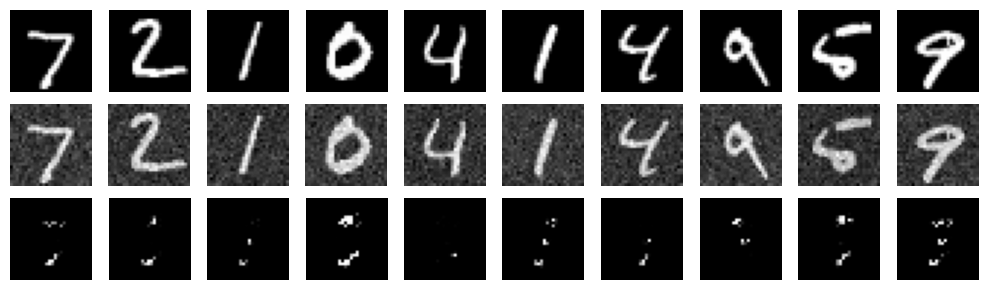

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# Define the denoising autoencoder model
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Using Sigmoid activation to scale values between 0 and 1
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model, loss function, and optimizer
model = DenoisingAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the denoising autoencoder
num_epochs = 2
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch in train_loader:
        images, _ = batch
        noisy_images = images + 0.2 * torch.randn(images.size())
        optimizer.zero_grad()
        outputs = model(noisy_images)
        loss = criterion(outputs, images.view(-1, 28 * 28))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader.dataset):.4f}")

# Visualize denoising results
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        break  # Exit after the first batch for visualization

    # Adding noise to test images
    noisy_images = images + 0.2 * torch.randn(images.size())

    # Denoise the test images using the trained autoencoder
    denoised_images = model(noisy_images)

    # Plot original, noisy, and denoised images
    plt.figure(figsize=(10, 3))
    for idx in range(10):
        plt.subplot(3, 10, idx + 1)
        plt.imshow(images[idx].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(3, 10, idx + 11)
        plt.imshow(noisy_images[idx].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(3, 10, idx + 21)
        plt.imshow(denoised_images[idx].view(28, 28).detach().numpy(), cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()




In [ ]:
pip install --upgrade torchtext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 620.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 677.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import spacy
from torchtext.datasets import IMDB
from torchtext import data

# Load SpaCy tokenizer
spacy_en = spacy.load('en_core_web_sm')

# Tokenization function
def tokenizer(text):
    return [tok.text for tok in spacy_en.tokenizer(text)]

# Define the data preprocessing steps using TorchText
TEXT = data.Field(tokenize=tokenizer, lower=True, include_lengths=True)
LABEL = data.LabelField(dtype=torch.float)

# Load IMDb dataset
train_data, test_data = IMDB.splits(TEXT, LABEL)

# Build vocabulary
TEXT.build_vocab(train_data, max_size=25000, vectors="glove.6B.100d")
LABEL.build_vocab(train_data)

# Create data iterators
train_loader, test_loader = data.BucketIterator.splits(
    (train_data, test_data), batch_size=64, sort_key=lambda x: len(x.text),
    sort_within_batch=True, device=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Define LSTM model for sentiment analysis
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers=1):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output, batch_first=True)
        hidden = self.dropout(hidden[-1])  # Get the last hidden state
        return self.fc(hidden)

# Initialize model and optimizer
vocab_size = len(TEXT.vocab)
embedding_dim = 100
hidden_dim = 256
output_dim = 1
num_layers = 2

model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        text, text_lengths = batch.text
        labels = batch.label
        optimizer.zero_grad()
        outputs = model(text, text_lengths).squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Testing
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        text, text_lengths = batch.text
        labels = batch.label
        outputs = model(text, text_lengths).squeeze(1)
        predicted = torch.round(torch.sigmoid(outputs))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')





AttributeError: ignored